# Overview

This notebook is intended to demo the capabilities of Amazon Rekognition AI Service for Images and Videos.  These demos will focus on a subset of functionality related to image and people recognition.  

Aaron Sengstacken - awsaaron@amazon.com


In [6]:
# import libraries
import boto3
import numpy
import cv2
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg

# Data


In [3]:
!wget https://cdnph.upi.com/svc/sv/upi/2051563553176/2019/1/202d0ff11f65a98c825ecf5cb1c7f12d/Travis-Kelce-Chiefs-extremely-motivated-Tyreek-Hill-huge-piece-to-puzzle.jpg

--2020-04-24 15:20:06--  https://cdnph.upi.com/svc/sv/upi/2051563553176/2019/1/202d0ff11f65a98c825ecf5cb1c7f12d/Travis-Kelce-Chiefs-extremely-motivated-Tyreek-Hill-huge-piece-to-puzzle.jpg
Resolving cdnph.upi.com (cdnph.upi.com)... 38.118.71.121
Connecting to cdnph.upi.com (cdnph.upi.com)|38.118.71.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55602 (54K) [image/jpeg]
Saving to: ‘Travis-Kelce-Chiefs-extremely-motivated-Tyreek-Hill-huge-piece-to-puzzle.jpg’

Travis-Kelce-Chiefs 100%[===================>]  54.30K  --.-KB/s    in 0.006s  

2020-04-24 15:20:06 (9.14 MB/s) - ‘Travis-Kelce-Chiefs-extremely-motivated-Tyreek-Hill-huge-piece-to-puzzle.jpg’ saved [55602/55602]



In [4]:
filename = 'Travis-Kelce-Chiefs-extremely-motivated-Tyreek-Hill-huge-piece-to-puzzle.jpg'

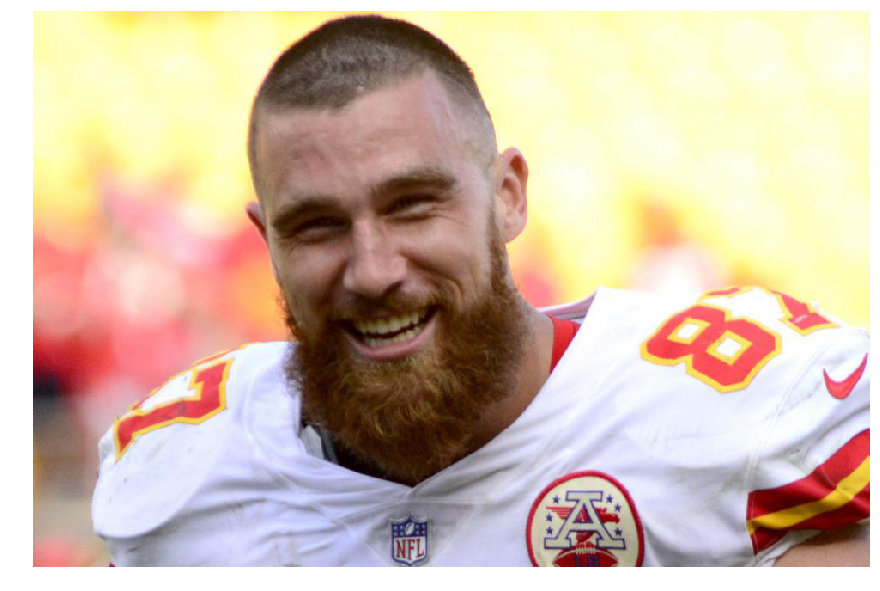

In [8]:
img=mpimg.imread(filename)
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(img)

## Find Faces in an Image

DetectFaces detects the 100 largest faces in the image. For each face detected, the operation returns face details. These details include a bounding box of the face, a confidence value (that the bounding box contains a face), and a fixed set of attributes such as facial landmarks (for example, coordinates of eye and mouth), presence of beard, sunglasses, and so on.

What is the image that we'll use to find the faces?

In [12]:
client=boto3.client('rekognition')
with open(filename, 'rb') as image:
    response = client.detect_faces(Image={'Bytes': image.read()}, Attributes=['ALL'])

In [13]:
response

{'FaceDetails': [{'BoundingBox': {'Width': 0.2812429368495941,
    'Height': 0.5756402015686035,
    'Left': 0.2753956913948059,
    'Top': 0.1454908549785614},
   'AgeRange': {'Low': 29, 'High': 45},
   'Smile': {'Value': True, 'Confidence': 99.91582489013672},
   'Eyeglasses': {'Value': False, 'Confidence': 99.89344787597656},
   'Sunglasses': {'Value': False, 'Confidence': 99.97118377685547},
   'Gender': {'Value': 'Male', 'Confidence': 97.44878387451172},
   'Beard': {'Value': True, 'Confidence': 83.04241180419922},
   'Mustache': {'Value': False, 'Confidence': 93.37359619140625},
   'EyesOpen': {'Value': True, 'Confidence': 76.76597595214844},
   'MouthOpen': {'Value': True, 'Confidence': 99.87781524658203},
   'Emotions': [{'Type': 'FEAR', 'Confidence': 0.024293530732393265},
    {'Type': 'CONFUSED', 'Confidence': 0.008502802811563015},
    {'Type': 'ANGRY', 'Confidence': 0.08922689408063889},
    {'Type': 'SURPRISED', 'Confidence': 0.0273370910435915},
    {'Type': 'DISGUSTED', 

In [14]:
response.keys()

dict_keys(['FaceDetails', 'ResponseMetadata'])

In [21]:
response['FaceDetails'][0]['Landmarks']

[{'Type': 'eyeLeft', 'X': 0.33665773272514343, 'Y': 0.3866092562675476},
 {'Type': 'eyeRight', 'X': 0.4538026750087738, 'Y': 0.34867313504219055},
 {'Type': 'mouthLeft', 'X': 0.3772987127304077, 'Y': 0.5729050040245056},
 {'Type': 'mouthRight', 'X': 0.4745604693889618, 'Y': 0.5423497557640076},
 {'Type': 'nose', 'X': 0.4033690392971039, 'Y': 0.48550862073898315},
 {'Type': 'leftEyeBrowLeft', 'X': 0.2873087227344513, 'Y': 0.3527085483074188},
 {'Type': 'leftEyeBrowRight',
  'X': 0.3487367331981659,
  'Y': 0.32947608828544617},
 {'Type': 'leftEyeBrowUp', 'X': 0.3149043917655945, 'Y': 0.3276011049747467},
 {'Type': 'rightEyeBrowLeft',
  'X': 0.4173285663127899,
  'Y': 0.3067969083786011},
 {'Type': 'rightEyeBrowRight',
  'X': 0.49578213691711426,
  'Y': 0.28411591053009033},
 {'Type': 'rightEyeBrowUp', 'X': 0.4522983133792877, 'Y': 0.28221213817596436},
 {'Type': 'leftEyeLeft', 'X': 0.31759947538375854, 'Y': 0.38932934403419495},
 {'Type': 'leftEyeRight', 'X': 0.36018696427345276, 'Y': 0.

In [28]:
def plot_bounding_box_image(img_file, img_response):
        
        # plot image
        img=mpimg.imread(img_file)
        plt.figure(figsize=(20,20))
        plt.axis('off')
        plt.imshow(img)
        height = img.shape[0]
        width = img.shape[1]

        # add bounding boxes
        for p,det in enumerate(img_response):
            
            bbox_w = det['BoundingBox']['Width']
            bbox_h = det['BoundingBox']['Height']
            bbox_t = det['BoundingBox']['Top']
            bbox_l = det['BoundingBox']['Left']

            rect = plt.Rectangle((int(bbox_l*width), int(bbox_t*height)), int(bbox_w*width),
                                 int(bbox_h*height), fill=False,
                                 edgecolor='white',
                                 linewidth=2.5)
            plt.gca().add_patch(rect)
            
            # add facial features
            for landmark in det['Landmarks']:
                plt.plot(landmark['X']*width,landmark['Y']*height,'wo')

        plt.show()

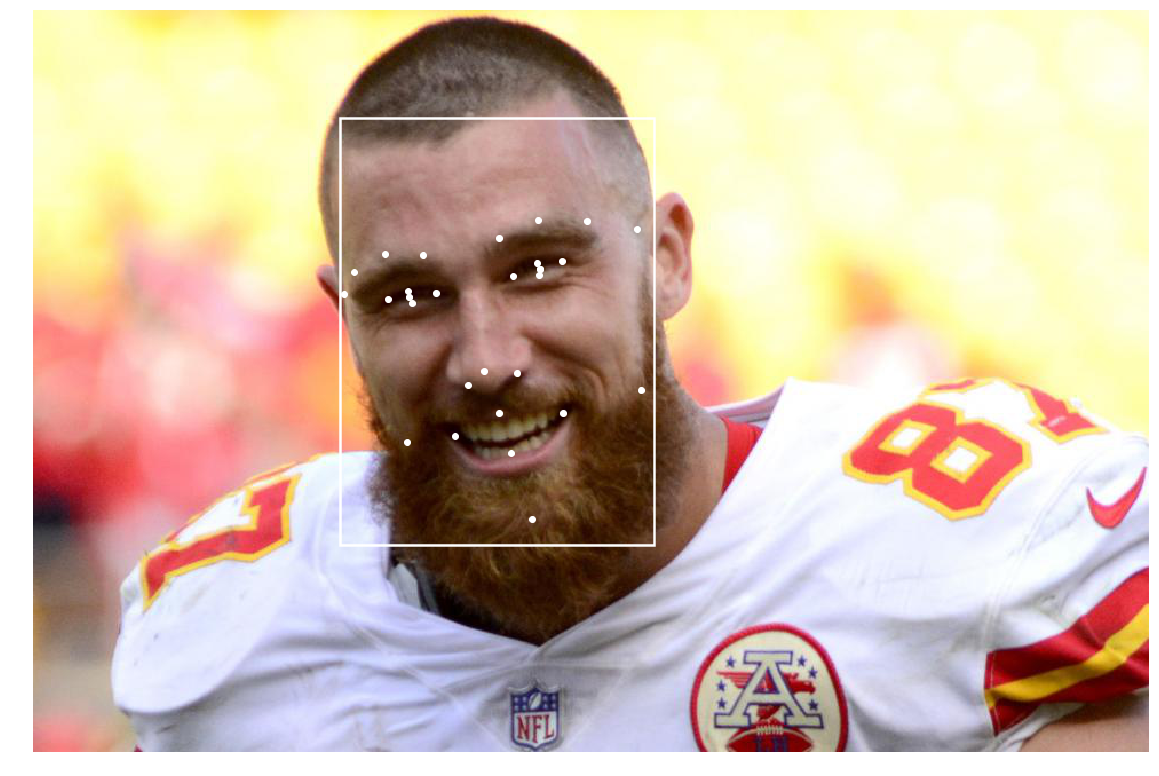

In [29]:
plot_bounding_box_image(filename,response['FaceDetails'])